<a href="https://colab.research.google.com/github/Syahrularifin634/Data-Mining/blob/main/UAS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset

In [ ]:
path = '/content/drive/MyDrive/Data Mining/segmentation data.csv'
data = pd.read_csv(path)

# Exploratory Data Analysis

In [ ]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [ ]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


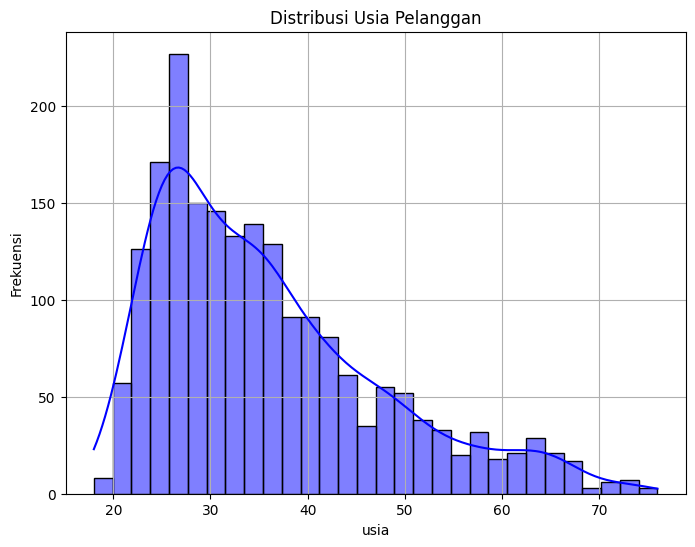

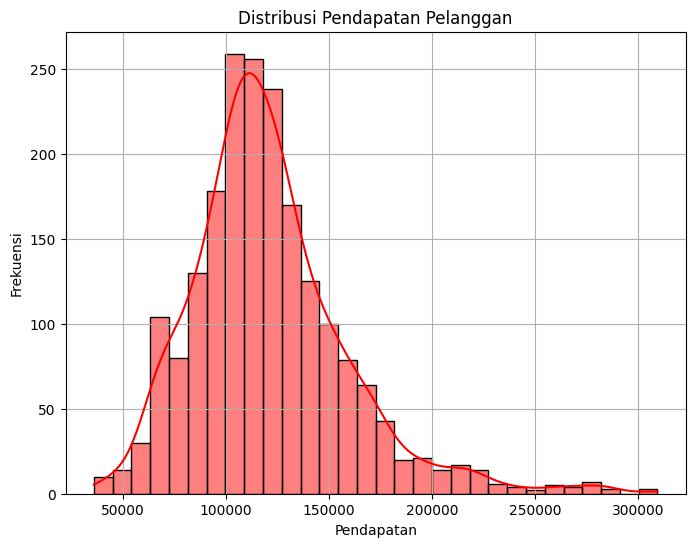

In [ ]:
# Visualisasi Distribusi Usia
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Visualisasi Distribusi Pendapatan
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()




# Data Preprocessing

In [ ]:
data_features = data[['Age', 'Income']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_features)

Data training and testing

In [ ]:
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Modelling

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
data['Cluster'] = kmeans.predict(X_scaled)

# Evaluasi Model

In [ ]:
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

train_score = silhouette_score(X_train, train_labels)
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score (Train): {train_score:.3f}")
print(f"Silhouette Score (Test): {test_score:.3f}")

Silhouette Score (Train): 0.437
Silhouette Score (Test): 0.441


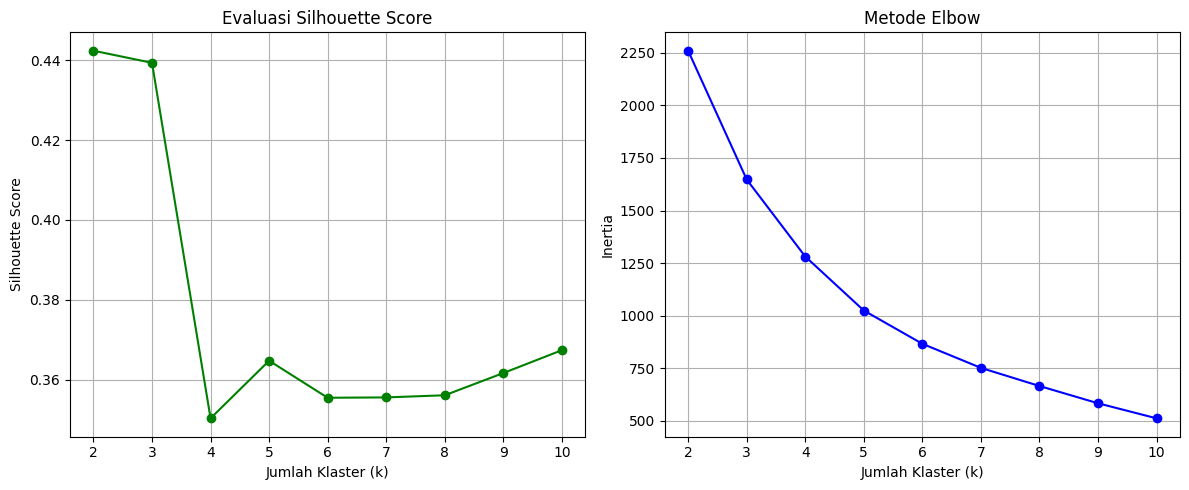

Silhouette Score: 0.439


In [ ]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.grid(True)


plt.subplot(1, 2, 1)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluasi Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {score:.3f}")


# Visualisasi Hasil Clustering

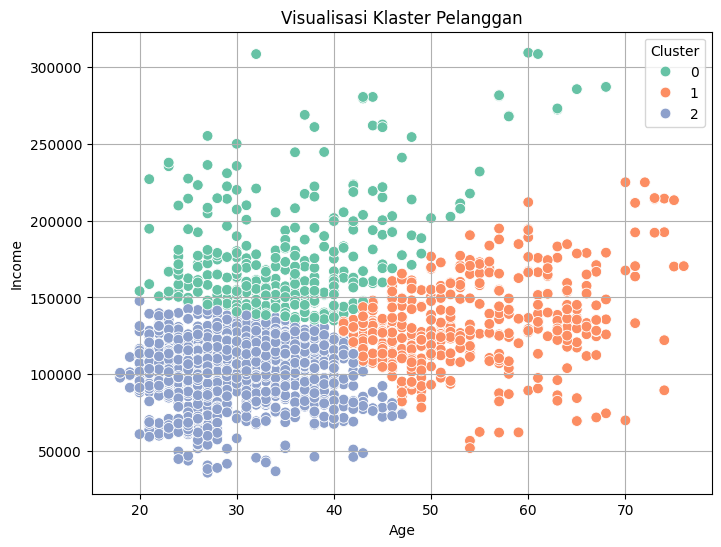

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Klaster Pelanggan')
plt.grid(True)
plt.show()




# Interpretasi: Label Segmen


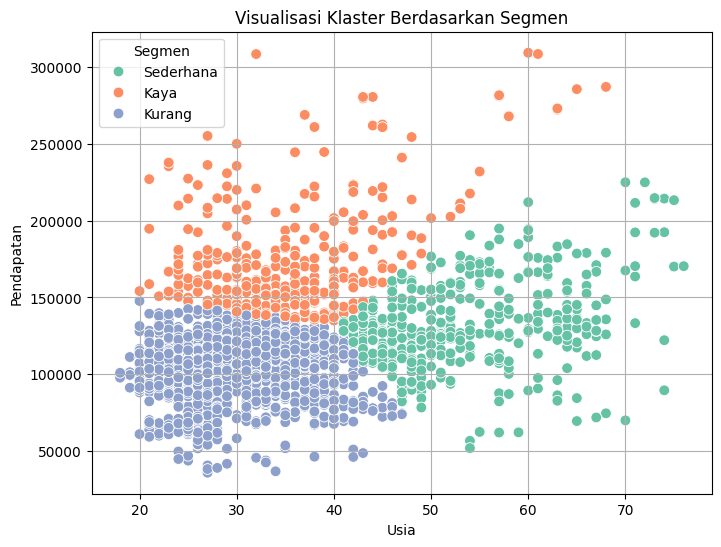

/tmp/ipython-input-26-2238490457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Segmen', palette='Set2')


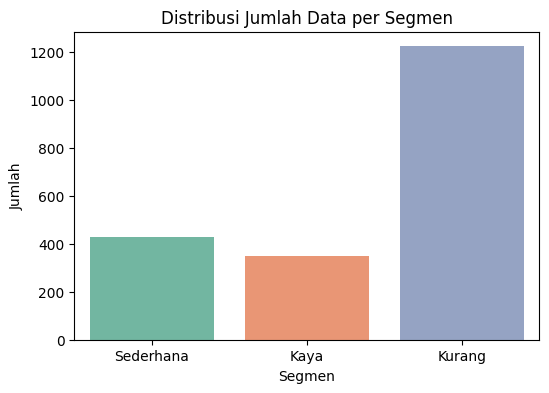


Statistik Rata-rata per Segmen:

             Age     Income
Segmen                     
Kaya       35.75  175173.26
Kurang     29.81  101568.99
Sederhana  53.46  132136.68


In [ ]:
income_mean = data.groupby('Cluster')['Income'].mean().sort_values()
cluster_order = income_mean.index.tolist()
labels = ['Kurang', 'Sederhana', 'Kaya']
cluster_labels = dict(zip(cluster_order, labels))
data['Segmen'] = data['Cluster'].map(cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='Segmen', palette='Set2', s=60)
plt.title('Visualisasi Klaster Berdasarkan Segmen')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.legend(title='Segmen')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Segmen', palette='Set2')
plt.title('Distribusi Jumlah Data per Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah')
plt.show()


print("\nStatistik Rata-rata per Segmen:\n")
print(data.groupby('Segmen')[['Age', 'Income']].mean().round(2))

In [ ]:
index = 89
segmen = data.iloc[index]['Segmen']
print(f"Baris ke-{index} termasuk dalam segmen: {segmen}")


Baris ke-89 termasuk dalam segmen: Kurang


uji coba nambah data baru akan masuk ke segmen mana

In [ ]:
new_data = pd.DataFrame([[25, 100000]], columns=['Age', 'Income'])
new_scaled = scaler.transform(new_data)
pred_cluster = kmeans.predict(new_scaled)[0]
pred_segmen = cluster_labels[pred_cluster]
print(f"Data baru termasuk ke dalam segmen: {pred_segmen}")


Data baru termasuk ke dalam segmen: Kurang
